In [14]:
import pandas as pd

df = pd.read_csv("Concrete_Compressive_Strength.csv")  # use your exact CSV name
df.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440188,353.3,12.174719,28754.55,5.291503
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937235,335.4,11.113019,26736.87,3.741657
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749597,345.7,7.272371,46850.00,5.291503
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857140,380.0,6.022534,60648.00,5.291503
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248700,338.2,11.266723,29922.84,5.291503


In [15]:
df.columns


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'water_cement_ratio', 'total_binder',
       'aggregate_to_cement', 'cement_water_interaction',
       'age_strength_proxy'],
      dtype='object')

In [16]:
feature_cols = [
    'cement',
    'slag',
    'ash',
    'water',
    'superplastic',
    'coarseagg',
    'fineagg',
    'age'
]

X = df[feature_cols]
y = df['strength']

X.head(), y.head()

(   cement   slag    ash  water  superplastic  coarseagg  fineagg  age
 0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
 1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
 2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
 3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
 4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28,
 0    29.89
 1    23.51
 2    29.22
 3    45.85
 4    18.29
 Name: strength, dtype: float64)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((824, 8), (206, 8))

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train, r2_test, mse_test

(0.6171915336945928, 0.6081118525118778, 112.1342696398112)

In [19]:
feature_cols = [
    'cement', 'slag', 'ash', 'water', 'superplastic',
    'coarseagg', 'fineagg', 'age',
    'water_cement_ratio', 'total_binder',
    'aggregate_to_cement', 'cement_water_interaction',
    'age_strength_proxy'
]

X = df[feature_cols]
y = df['strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_test_pred = lin_reg.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test, rmse_test


(0.8073109477934888, np.float64(7.42534497389195))

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Random Forest model
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predict on test set
y_test_pred_rf = rf.predict(X_test)

# Metrics
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

r2_test_rf, rmse_test_rf


(0.906925893632783, np.float64(5.160627978773489))

In [21]:
import pandas as pd
import numpy as np

results = pd.DataFrame({
    'model': ['LinearRegression', 'RandomForestRegressor'],
    'R2_test': [r2_test, r2_test_rf],
    'RMSE_test': [rmse_test, rmse_test_rf]
})

results

,model,R2_test,RMSE_test
0,LinearRegression,0.807311,7.425345
1,RandomForestRegressor,0.906926,5.160628


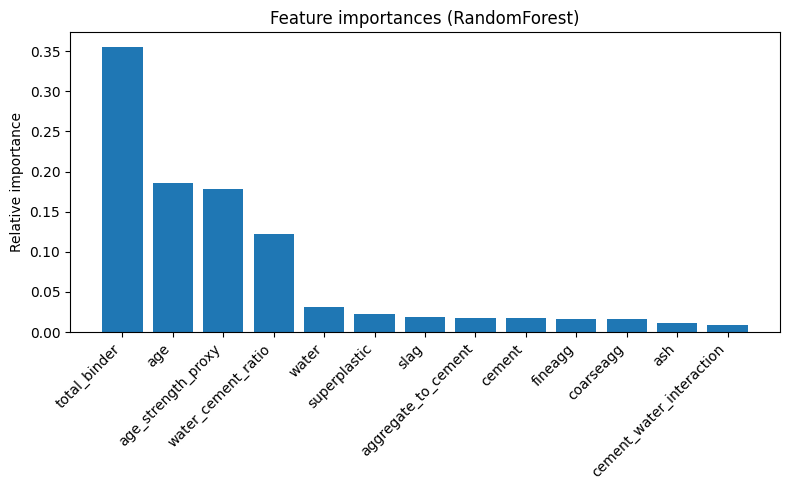

In [22]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns  # uses your current feature columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # sort from most to least important

plt.figure(figsize=(8, 5))
plt.title("Feature importances (RandomForest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Relative importance")
plt.tight_layout()
plt.show()

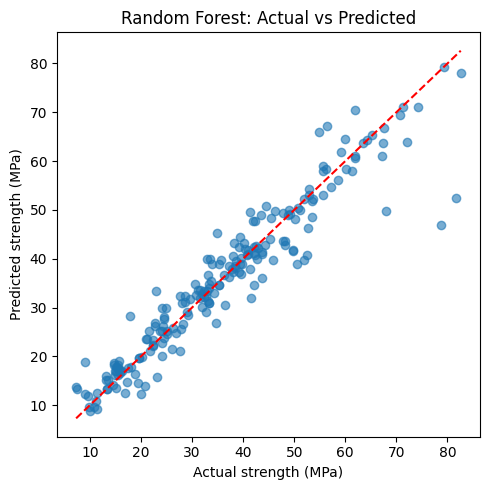

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6)
plt.xlabel("Actual strength (MPa)")
plt.ylabel("Predicted strength (MPa)")
plt.title("Random Forest: Actual vs Predicted")
# 45-degree reference line
min_val = min(y_test.min(), y_test_pred_rf.min())
max_val = max(y_test.max(), y_test_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.show()

In [24]:
import joblib  # comes with Anaconda

joblib.dump(rf, "concrete_rf_model.joblib")
print("Model saved.")


Model saved.


In [25]:
import os
print(os.getcwd())


C:\Users\SAIBALA\Downloads\concrete_strength


In [26]:
# Save test features and labels to CSV in the same folder
X_test.to_csv("X_test_concrete.csv", index=False)
y_test.to_csv("y_test_concrete.csv", index=False)

print("Saved X_test_concrete.csv and y_test_concrete.csv")


Saved X_test_concrete.csv and y_test_concrete.csv


In [27]:
X_test_loaded = pd.read_csv("X_test_concrete.csv")
y_test_loaded = pd.read_csv("y_test_concrete.csv")

X_test_loaded.head(), y_test_loaded.head()


(   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
 0   475.0    0.0    0.0  228.0           0.0      932.0    594.0   28   
 1   326.5    0.0  137.9  199.0          10.8      801.1    792.5   28   
 2   166.8  250.2    0.0  203.5           0.0      975.6    692.6   90   
 3   362.6  189.0    0.0  164.9          11.6      944.7    755.8    3   
 4   239.6  359.4    0.0  185.7           0.0      941.6    664.3   28   
 
    water_cement_ratio  total_binder  aggregate_to_cement  \
 0            0.479999         475.0             3.212625   
 1            0.609493         464.4             4.880843   
 2            1.220017         417.0            10.001139   
 3            0.454770         551.6             4.689728   
 4            0.775039         599.0             6.702393   
 
    cement_water_interaction  age_strength_proxy  
 0                 108300.00            5.291503  
 1                  64973.50            5.291503  
 2                  33943.80     